# TSNE Bag Of Words For Amazon Fine Food Reviews 

This Dataset conists of reviews of fine foods from amazon.
which includes:
- Reviews from Oct 1999 - Oct 2012
- Total of 568,454 reviews
- Given by 256,059 users
- For 74,258 products


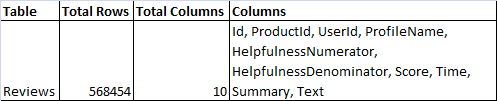

# Data Cleaning and Loading

The same data is cleaned, by removing the duplicates and the reviews for which HelpfulnessNumerator is greater than HelpfulnessDenominator. So it is reduced to 364171 reviews with same 10 columns. This data with 364171 reviews is stored in a SQLite Database named 'final_sqlite' and the table for these reviews is 'Reviews'.


We load the data using SQLite in to pandas dataframe

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('final_sqlite')
data = pd.read_sql_query('''SELECT Score, Text FROM Reviews''', conn)
print(data.shape)


(364171, 2)


In [2]:
print(data.columns)

Index(['Score', 'Text'], dtype='object')


In [3]:
def convert(x):
    '''To convert the reviews to positive or negative'''
    return 'neg' if x<3 else 'pos'
score =  data['Score'].map(convert)
print(data.shape)
print(score.shape)

(364171, 2)
(364171,)


Here we determine a review as Positive or Negative by using the score.
If score is more than 3 then it is considered as a positive and negative if it is less than 3 and will ignore if score is 3, as we can't decide whether it will fall into positive or negative category. The data which is in the Reviews table is queried/ saved without the reviews with score 3.

# Bag of Words (BoW)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_bow = CountVectorizer().fit_transform(data['Text'].values)
print(count_bow.shape)


(364171, 115281)


Convert the text for 364171 into vector/matrix representation and standardize the data

In [6]:
from sklearn.preprocessing import StandardScaler
count_bow = StandardScaler(with_mean=False).fit_transform(count_bow)
print(count_bow[1])

D:\Users\KiranPS\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


  (0, 8302)	1.1851086115740195
  (0, 22104)	24.730565378835724
  (0, 32660)	13.073641662088296
  (0, 38548)	2.3871840653562346
  (0, 46326)	32.98310973206567
  (0, 51585)	12.298488021431684
  (0, 52923)	9.986788428703456
  (0, 53094)	4.0408969259277985
  (0, 55547)	4.128973773230814
  (0, 57291)	94.2503285030743
  (0, 59284)	0.4119692211794202
  (0, 61054)	3.9320738908039576
  (0, 61515)	5.259917972532414
  (0, 65217)	1.9326505199876496
  (0, 65253)	4.020628990058333
  (0, 69720)	12.495667946128581
  (0, 71036)	12.2202699447781
  (0, 71724)	0.8437002994708424
  (0, 74846)	0.4870636075493689
  (0, 75602)	5.83334728292302
  (0, 77247)	54.19883219668025
  (0, 77662)	426.7159476812321
  (0, 85871)	9.456186463476008
  (0, 85950)	2.100640162863404
  (0, 89733)	118.35140991732672
  (0, 92467)	6.39692788895476
  (0, 92695)	110.17857225632895
  (0, 96473)	5.886741734284408
  (0, 101824)	8.33122488500116
  (0, 103344)	0.7363568754324233
  (0, 103373)	1.0036066096709653
  (0, 103443)	3.5280048146

# TSNE Visualization of BOW

In [7]:
from sklearn.manifold import TSNE
features =count_bow
print(features.shape)
print(score.shape) 

(364171, 115281)
(364171,)


We choose 2000 records to visualize data using TSNE

In [8]:
f_2k = features[0:2000].todense()
s_2k = score[0:2000]
print(f_2k.shape)

(2000, 115281)


In [9]:
model = TSNE(n_components =2, random_state = 0)
tsne_data = model.fit_transform(f_2k)
print(tsne_data.shape)

(2000, 2)


In [10]:
import numpy as np
c_data = np.vstack((tsne_data.T, s_2k)).T
df = pd.DataFrame(c_data, columns =( 'vector1', 'vector2', 'label'))
print(df.shape)

(2000, 3)


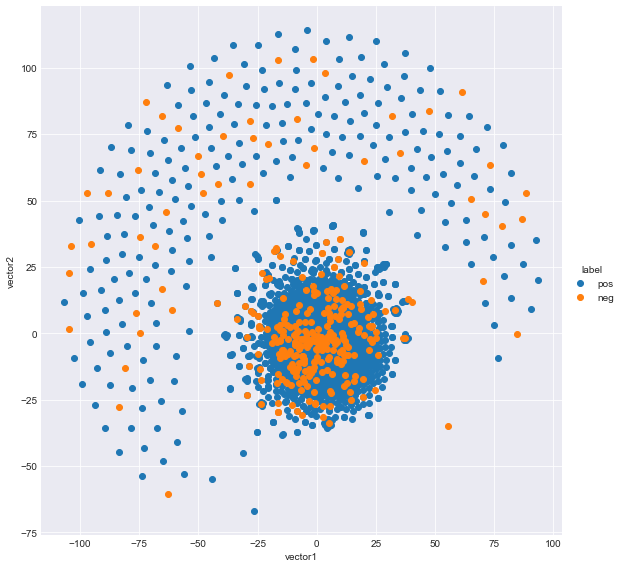

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'label', size =8).map(plt.scatter,'vector1', 'vector2').add_legend()
plt.show()

We choose 10000 records to visualize data using TSNE

In [12]:
f_10k = features[0:10000].todense()
s_10k = score[0:10000]
print(f_10k.shape)

(10000, 115281)


In [13]:
model = TSNE(n_components =2, random_state = 0)
tsne_data = model.fit_transform(f_10k)
print(tsne_data.shape)

(10000, 2)


In [14]:
import numpy as np
c_data = np.vstack((tsne_data.T, s_10k)).T
df = pd.DataFrame(c_data, columns =( 'vector1', 'vector2', 'label'))
print(df.shape)

(10000, 3)


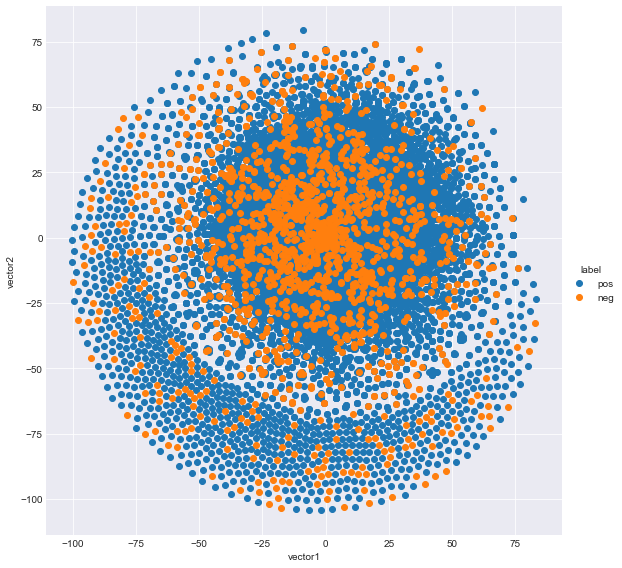

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'label', size =8).map(plt.scatter,'vector1', 'vector2').add_legend()
plt.show()

# Observations:

Both the plots doesnot give much variations and we cannot bifercate or differentiate whether a review is positive or negative.
Both the reviews are spread accross the graph. So we will proceed with other approaches and check whether they can be bifercated.